In [8]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('factbook.db')
q = "SELECT * FROM sqlite_master WHERE type='table';"
db = pd.read_sql_query(q, conn)
db

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [9]:
#conn_1 = sqlite3.connect('facts.db')
cursor = conn.cursor()
query = "SELECT * FROM facts LIMIT 5"
five_facts = pd.read_sql_query(query, conn)
five_facts

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


In [10]:
query2 = 'SELECT MIN(population), MAX(population),MIN(population_growth), MAX(population_growth) FROM facts'
max_min_pop = pd.read_sql_query(query2, conn)
max_min_pop

,MIN(population),MAX(population),MIN(population_growth),MAX(population_growth)
0,0,7256490011,0.0,4.02


In [11]:
query3 = 'SELECT name FROM facts WHERE population = 0'
min_pop_country = pd.read_sql_query(query3, conn)
min_pop_country

,name
0,Antarctica


In [12]:
query4 = 'SELECT name, MAX(population) FROM facts'
max_pop_country = pd.read_sql_query(query4, conn)
max_pop_country

,name,MAX(population)
0,World,7256490011


From the above queries, it can be observed that Antarctica has no population  while the maximum population of more than 7.2 billion observed in the data came from the population of all countries in the world combined

In [19]:
query5 = "SELECT name, population, population_growth, birth_rate, death_rate FROM facts WHERE name != 'Antarctica' AND name != 'World'"
countries = pd.read_sql_query(query5, conn)
countries = countries.dropna()
countries

,name,population,population_growth,birth_rate,death_rate
0,Afghanistan,32564342.0,2.32,38.57,13.89
1,Albania,3029278.0,0.30,12.92,6.58
2,Algeria,39542166.0,1.84,23.67,4.31
3,Andorra,85580.0,0.12,8.13,6.96
4,Angola,19625353.0,2.78,38.78,11.49
5,Antigua and Barbuda,92436.0,1.24,15.85,5.69
6,Argentina,43431886.0,0.93,16.64,7.33
7,Armenia,3056382.0,0.15,13.61,9.34
8,Australia,22751014.0,1.07,12.15,7.14
9,Austria,8665550.0,0.55,9.41,9.42


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f23acc20128>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f23acdfe940>]], dtype=object)

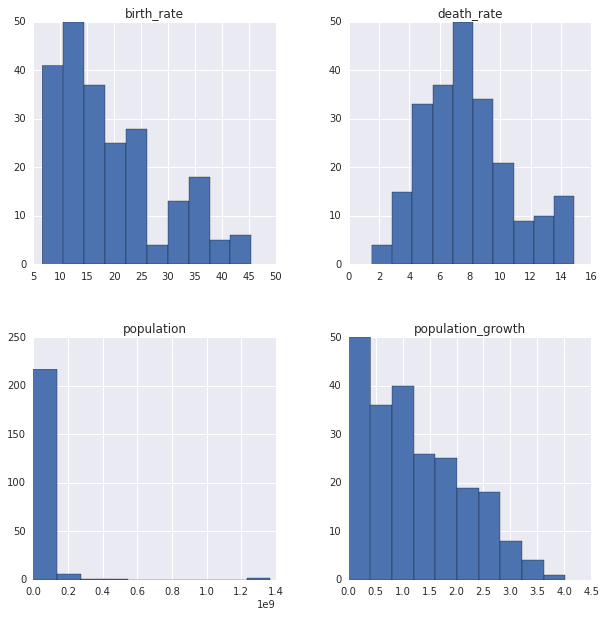

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


countries.hist(figsize=(10,10))

In [23]:
countries.sort_values('population', ascending=False)

,name,population,population_growth,birth_rate,death_rate
36,China,1.367485e+09,0.45,12.49,7.53
76,India,1.251696e+09,1.22,19.55,7.32
196,European Union,5.139494e+08,0.25,10.20,10.20
185,United States,3.213689e+08,0.78,12.49,8.15
77,Indonesia,2.559937e+08,0.92,16.72,6.37
23,Brazil,2.042598e+08,0.77,14.46,6.58
131,Pakistan,1.990858e+08,1.46,22.58,6.49
128,Nigeria,1.815621e+08,2.45,37.64,12.90
13,Bangladesh,1.689577e+08,1.60,21.14,5.61
142,Russia,1.424238e+08,0.04,11.60,13.69
